# 중고차 가격 예측하기

<span style="color:blue"> 환경 준비 </span>

In [101]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'


In [102]:
# 데이터 읽어오기
path = 'D:\PRACTICE\\used_cars.csv'
data = pd.read_csv(path)

<br/>
<span style="color:blue"> 데이터 이해 </span>

In [103]:
# 상위 몇 개 행 확인
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [104]:
data.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [105]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


* **Brand & Model:** Identify the brand or company name along with the specific model of each vehicle.
* **Model Year:** Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* **Mileage:** Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* **Fuel Type:** Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* **Engine Type:** Understand the engine specifications, shedding light on performance and efficiency.
* **Transmission:** Determine the transmission type, whether automatic, manual, or another variant.
* **Exterior & Interior Colors:** Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* **Accident History:** Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* **Clean Title:** Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* **Price:** Access the listed prices for each vehicle, aiding in price comparison and budgeting

<br/>
<span style="color:blue"> 데이터 준비 </span>

### 결측치 처리

In [107]:
data.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

**fuel_type 결측치 처리**

model 값이 동일한 행의 fuel_type 값을 넣어줌

In [108]:
# 모델을 기준으로 정렬
data = data.sort_values('model')
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
704,FIAT,124 Spider Abarth,2017,"45,000 mi.",Gasoline,164.0HP 1.4L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,"$22,500"
2900,BMW,128 i,2013,"67,874 mi.",Gasoline,230.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Gray,Black,None reported,Yes,"$18,000"
509,BMW,135 i,2008,"87,000 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,White,Beige,None reported,Yes,"$15,300"
1507,BMW,135 i,2011,"132,000 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Black,Beige,None reported,Yes,"$11,000"
715,BMW,135 i,2009,"72,900 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Gray,Gray,None reported,Yes,"$15,500"
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,Scion,tC Anniversary Edition,2014,"99,999 mi.",Gasoline,179.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,"$10,998"
1284,Scion,tC Anniversary Edition,2014,"115,000 mi.",Gasoline,179.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Silver,None reported,Yes,"$11,495"
177,Scion,tC Base,2013,"177,600 mi.",Gasoline,180.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Silver,Black,At least 1 accident or damage reported,Yes,"$7,100"
690,Scion,tC Release Series 6.0,2010,"120,010 mi.",Gasoline,161.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,4-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,"$6,500"


In [109]:
df = data.groupby('model', as_index = False)[['fuel_type']].count()
df

,model,fuel_type
0,124 Spider Abarth,1
1,128 i,1
2,135 i,3
3,135 is,1
4,1500 Big Horn,11
...,...,...
1893,i8 Base,5
1894,tC Anniversary Edition,2
1895,tC Base,1
1896,tC Release Series 6.0,1


In [9]:
# fuel_type 값이 NaN인데 동일한 model 값도 존재하지 않는 경우
df[df['fuel_type'] == 0]

,model,fuel_type
18,2 Launch Edition,0
95,500e Battery Electric,0
258,Air Grand Touring,0
259,Air Pure,0
309,Bolt EUV Premier,0
...,...,...
1887,e-tron Premium,0
1888,e-tron Prestige,0
1890,i3 94 Ah,0
1891,i3 Base,0


In [110]:
type(df)

pandas.core.frame.DataFrame

In [111]:
# fuel_type 열의 최빈값
data['fuel_type'].mode()

0    Gasoline
dtype: object

In [112]:
for index, row in data.iterrows() :
    if (type(row.fuel_type) == str) and (len(row.fuel_type) >= 2) :
        continue
        
    else :  
        d = df.loc[df['model'] == row.model]
        
        if (d['fuel_type'].any() != 0) :
            try : 
                data.fuel_type.fillna(method = 'bfill', limit = 1, inplace = True)
            except :
                continue
                
        else :
            try :
                data.fuel_type.fillna('Gasoline', inplace = True)
            except :
                continue

data.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [113]:
data = data.sort_values('fuel_type')
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1940,Ford,F-250 Lariat,2019,"85,000 mi.",Diesel,450.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$52,500"
1059,Chevrolet,Silverado 3500 High Country,2015,"77,500 mi.",Diesel,397.0HP 6.6L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,Black,Brown,None reported,Yes,"$54,000"
1281,Chevrolet,Silverado 3500 LTZ,2022,"85,200 mi.",Diesel,445.0HP 6.6L 8 Cylinder Engine Diesel Fuel,10-Speed A/T,Silver,Gray,None reported,Yes,"$67,500"
1635,Chevrolet,Silverado 3500 LTZ,2018,"92,149 mi.",Diesel,6.6L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Black,Jet Black,NaN,NaN,"$52,889"
502,Chevrolet,Express 3500 LT,2016,"120,000 mi.",Diesel,260.0HP 6.6L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,Gray,None reported,Yes,"$19,500"
...,...,...,...,...,...,...,...,...,...,...,...,...
2303,Acura,NSX Base,1993,"75,980 mi.",–,–,A/T,Silver,Black,None reported,Yes,"$90,200"
2103,Volvo,850 Turbo,1995,"94,000 mi.",–,–,A/T,White,Black,None reported,Yes,"$4,500"
855,Ford,Bronco,1974,"6,217 mi.",–,–,–,Dark Gray Metallic,–,None reported,Yes,"$115,000"
3213,Ford,Mustang EcoBoost Premium,2019,"31,000 mi.",–,–,6-Speed M/T,Gray,Black,None reported,Yes,"$34,700"


In [114]:
data['fuel_type'].unique()

array(['Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
       'not supported', '–'], dtype=object)

In [115]:
data = data.sort_values('model')
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
704,FIAT,124 Spider Abarth,2017,"45,000 mi.",Gasoline,164.0HP 1.4L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,"$22,500"
2900,BMW,128 i,2013,"67,874 mi.",Gasoline,230.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Gray,Black,None reported,Yes,"$18,000"
715,BMW,135 i,2009,"72,900 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Gray,Gray,None reported,Yes,"$15,500"
1507,BMW,135 i,2011,"132,000 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Black,Beige,None reported,Yes,"$11,000"
509,BMW,135 i,2008,"87,000 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,White,Beige,None reported,Yes,"$15,300"
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,Scion,tC Anniversary Edition,2014,"99,999 mi.",Gasoline,179.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,"$10,998"
1284,Scion,tC Anniversary Edition,2014,"115,000 mi.",Gasoline,179.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Silver,None reported,Yes,"$11,495"
177,Scion,tC Base,2013,"177,600 mi.",Gasoline,180.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Silver,Black,At least 1 accident or damage reported,Yes,"$7,100"
690,Scion,tC Release Series 6.0,2010,"120,010 mi.",Gasoline,161.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,4-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,"$6,500"


In [116]:
# '–'로 잘못 표기된 NaN 값들을 NaN으로 바꿔주기
for index, row in data.iterrows() :
    if (type(row.fuel_type) == str) and (len(row.fuel_type) >= 2) :
        continue
        
    else :  
        data.loc[index, 'fuel_type'] = np.NaN

In [117]:
data.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type        45
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [118]:
# NaN 값들을 다시 한 번 bfill로 채워줌
for index, row in data.iterrows() :
    if (type(row.fuel_type) == str) and (len(row.fuel_type) >= 2) :
        continue
        
    else :
        try : 
            data.fuel_type.fillna(method = 'bfill', limit = 1, inplace = True)
        except :
            continue

In [119]:
data = data.sort_values('fuel_type')
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3292,Mercedes-Benz,Sprinter 2500 Standard Roof,2021,"13,344 mi.",Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,7-Speed A/T,Red,Black,None reported,Yes,"$56,500"
3550,Ford,F-350 King Ranch,2015,"92,421 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,Brown,None reported,Yes,"$51,900"
3708,Ford,F-350 Lariat,2018,"66,281 mi.",Diesel,450.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,"$63,500"
3261,Ford,F-350 Lariat,2015,"162,000 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Red,Beige,None reported,Yes,"$32,000"
2170,Ford,F-350 Lariat,2021,"28,220 mi.",Diesel,475.0HP 6.7L 8 Cylinder Engine Diesel Fuel,10-Speed A/T,Silver,Black,None reported,Yes,"$73,600"
...,...,...,...,...,...,...,...,...,...,...,...,...
3825,Toyota,Prius Plug-in Base,2014,"106,000 mi.",Plug-In Hybrid,134.0HP 1.8L 4 Cylinder Engine Plug-In Electri...,A/T,Green,Beige,At least 1 accident or damage reported,Yes,"$11,800"
1820,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription 7 ...,2022,"7,800 mi.",Plug-In Hybrid,455.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,8-Speed A/T,Black,Beige,None reported,Yes,"$66,000"
1509,Hyundai,IONIQ 5 SE,2022,"18,500 mi.",Plug-In Hybrid,320.0HP Electric Motor Electric Fuel System,A/T,White,Black,None reported,Yes,"$42,000"
3700,Toyota,Mirai Base,2016,"40,000 mi.",not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,"$9,500"


In [120]:
data['fuel_type'].unique()

array(['Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
       'not supported'], dtype=object)

----------

**accident 결측치 처리**

결측치인 행 제외

In [121]:
# 값 확인
data['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [122]:
# accident 값을 숫자로 바꿔주기 (가변수화)
data = data.replace({'accident': 'None reported'}, 0)
data = data.replace({'accident': 'At least 1 accident or damage reported'}, 1)
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3292,Mercedes-Benz,Sprinter 2500 Standard Roof,2021,"13,344 mi.",Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,7-Speed A/T,Red,Black,0.0,Yes,"$56,500"
3550,Ford,F-350 King Ranch,2015,"92,421 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,Brown,0.0,Yes,"$51,900"
3708,Ford,F-350 Lariat,2018,"66,281 mi.",Diesel,450.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Gray,Black,0.0,Yes,"$63,500"
3261,Ford,F-350 Lariat,2015,"162,000 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Red,Beige,0.0,Yes,"$32,000"
2170,Ford,F-350 Lariat,2021,"28,220 mi.",Diesel,475.0HP 6.7L 8 Cylinder Engine Diesel Fuel,10-Speed A/T,Silver,Black,0.0,Yes,"$73,600"
...,...,...,...,...,...,...,...,...,...,...,...,...
3825,Toyota,Prius Plug-in Base,2014,"106,000 mi.",Plug-In Hybrid,134.0HP 1.8L 4 Cylinder Engine Plug-In Electri...,A/T,Green,Beige,1.0,Yes,"$11,800"
1820,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription 7 ...,2022,"7,800 mi.",Plug-In Hybrid,455.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,8-Speed A/T,Black,Beige,0.0,Yes,"$66,000"
1509,Hyundai,IONIQ 5 SE,2022,"18,500 mi.",Plug-In Hybrid,320.0HP Electric Motor Electric Fuel System,A/T,White,Black,0.0,Yes,"$42,000"
3700,Toyota,Mirai Base,2016,"40,000 mi.",not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,0.0,Yes,"$9,500"


In [123]:
data['accident'].value_counts()

0.0    2910
1.0     986
Name: accident, dtype: int64

In [124]:
# accident가 결측치인 경우는 제외하기로 함
data = data.loc[data['accident'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 3292 to 2894
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3896 non-null   object 
 1   model         3896 non-null   object 
 2   model_year    3896 non-null   int64  
 3   milage        3896 non-null   object 
 4   fuel_type     3896 non-null   object 
 5   engine        3896 non-null   object 
 6   transmission  3896 non-null   object 
 7   ext_col       3896 non-null   object 
 8   int_col       3896 non-null   object 
 9   accident      3896 non-null   float64
 10  clean_title   3413 non-null   object 
 11  price         3896 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 395.7+ KB


-------

**clean_title 결측치 처리**

결측치를 'No'로 변경

In [125]:
data['clean_title'].value_counts()

Yes    3413
Name: clean_title, dtype: int64

In [126]:
data['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [127]:
# 결측치를 No로 변경
data.clean_title.fillna('No', inplace = True)
data['clean_title'].value_counts()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Yes    3413
No      483
Name: clean_title, dtype: int64

------

### 가변수화

In [128]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3292,Mercedes-Benz,Sprinter 2500 Standard Roof,2021,"13,344 mi.",Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,7-Speed A/T,Red,Black,0.0,Yes,"$56,500"
3550,Ford,F-350 King Ranch,2015,"92,421 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,Brown,0.0,Yes,"$51,900"
3708,Ford,F-350 Lariat,2018,"66,281 mi.",Diesel,450.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Gray,Black,0.0,Yes,"$63,500"
3261,Ford,F-350 Lariat,2015,"162,000 mi.",Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,Transmission w/Dual Shift Mode,Red,Beige,0.0,Yes,"$32,000"
2170,Ford,F-350 Lariat,2021,"28,220 mi.",Diesel,475.0HP 6.7L 8 Cylinder Engine Diesel Fuel,10-Speed A/T,Silver,Black,0.0,Yes,"$73,600"


**price 가변수화**

In [129]:
# $ 지우기
for index, row in data.iterrows():
    data.loc[index, 'price'] = data.loc[index, 'price'].strip("$")

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [130]:
# , 지우기
for index, row in data.iterrows():
    data.loc[index, 'price'] = data.loc[index, 'price'].replace(',', '')

In [131]:
# str -> int 로 단위 바꾸기
data['price'] = data['price'].astype('int64')
# data.head()

<ipython-input-131-df78d7087208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype('int64')


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 3292 to 2894
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3896 non-null   object 
 1   model         3896 non-null   object 
 2   model_year    3896 non-null   int64  
 3   milage        3896 non-null   object 
 4   fuel_type     3896 non-null   object 
 5   engine        3896 non-null   object 
 6   transmission  3896 non-null   object 
 7   ext_col       3896 non-null   object 
 8   int_col       3896 non-null   object 
 9   accident      3896 non-null   float64
 10  clean_title   3896 non-null   object 
 11  price         3896 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 555.7+ KB


**brand 가변수화**

In [133]:
data['brand'].value_counts()

Ford             372
BMW              367
Mercedes-Benz    310
Chevrolet        285
Toyota           196
Audi             194
Porsche          186
Lexus            161
Jeep             138
Land             126
Nissan           114
Cadillac         104
RAM               90
Dodge             89
GMC               88
Tesla             87
Kia               75
Hyundai           68
Acura             63
Subaru            63
Mazda             62
Honda             60
Volkswagen        59
INFINITI          56
Lincoln           50
Jaguar            46
Volvo             37
Maserati          33
MINI              32
Bentley           31
Buick             30
Chrysler          27
Lamborghini       26
Mitsubishi        20
Genesis           19
Hummer            16
Alfa              16
Pontiac           15
Rivian            15
Ferrari           12
Rolls-Royce       10
Aston              8
Scion              6
McLaren            6
Saturn             5
FIAT               5
Mercury            3
Lotus        

In [134]:
data = data.sort_values('brand')

data.reset_index(drop = True, inplace = True)
# data.head()

In [135]:
len(data)

3896

In [136]:
data['brand'].value_counts()

Ford             372
BMW              367
Mercedes-Benz    310
Chevrolet        285
Toyota           196
Audi             194
Porsche          186
Lexus            161
Jeep             138
Land             126
Nissan           114
Cadillac         104
RAM               90
Dodge             89
GMC               88
Tesla             87
Kia               75
Hyundai           68
Acura             63
Subaru            63
Mazda             62
Honda             60
Volkswagen        59
INFINITI          56
Lincoln           50
Jaguar            46
Volvo             37
Maserati          33
MINI              32
Bentley           31
Buick             30
Chrysler          27
Lamborghini       26
Mitsubishi        20
Genesis           19
Hummer            16
Alfa              16
Rivian            15
Pontiac           15
Ferrari           12
Rolls-Royce       10
Aston              8
Scion              6
McLaren            6
Saturn             5
FIAT               5
Mercury            3
Lotus        

In [138]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 0] = k
        break
    
    else :
        if(data.iloc[i, 0] == data.iloc[i + 1, 0]) :
#            print('case2')
#            print('k=', k)
            data.iloc[i, 0] = k
        
        else :
#            print('case3')
#            print('k=', k)
            data.iloc[i, 0] = k
            k = k + 1

# data.head()

In [139]:
# str -> int 로 단위 바꾸기
data['brand'] = data['brand'].astype('int64')
# data.head()

**model 가변수화**

In [140]:
data = data.sort_values('model')

data.reset_index(drop = True, inplace = True)
# data.head()

In [141]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 1] = k
        break
    
    else :
        if(data.iloc[i, 1] == data.iloc[i + 1, 1]) :
#            print('case2')
#            print('k=', k)
            data.iloc[i, 1] = k
        
        else :
#            print('case3')
#            print('k=', k)
            data.iloc[i, 1] = k
            k = k + 1

# data.head()

In [142]:
# str -> int 로 단위 바꾸기
data['model'] = data['model'].astype('int64')
# data.head()

**milage 가변수화**

In [143]:
# , 지우기
for index, row in data.iterrows():
    data.loc[index, 'milage'] = data.loc[index, 'milage'].replace(',', '')
    data.loc[index, 'milage'] = data.loc[index, 'milage'].replace('mi.', '')

In [144]:
# str -> int 로 단위 바꾸기
data['milage'] = data['milage'].astype('int64')
# data.head()

**fuel_type 가변수화**

In [145]:
data = data.sort_values('fuel_type')

data.reset_index(drop = True, inplace = True)
# data.head()

In [146]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 4] = k
        break
    
    else :
        if(data.iloc[i, 4] == data.iloc[i + 1, 4]) :
#            print('case2')
#            print('k=', k)
            data.iloc[i, 4] = k
        
        else :
#            print('case3')
#            print('k=', k)
            data.iloc[i, 4] = k
            k = k + 1

# data.head()

In [147]:
# str -> int 로 단위 바꾸기
data['fuel_type'] = data['fuel_type'].astype('int64')
# data.head()

**engine 가변수화**

In [148]:
data = data.sort_values('engine')

data.reset_index(drop = True, inplace = True)
# data.head()

In [149]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 5] = k
        break
    
    else :
        if(data.iloc[i, 5] == data.iloc[i + 1, 5]) :
#            print('case2')
#            print('k=', k)
            data.iloc[i, 5] = k
        
        else :
#             print('case3')
#             print('k=', k)
            data.iloc[i, 5] = k
            k = k + 1

# data.head()

In [150]:
# str -> int 로 단위 바꾸기
data['engine'] = data['engine'].astype('int64')
# data.head()

In [151]:
data['engine'].value_counts()

198     52
724     48
871     46
1129    44
325     42
        ..
391      1
766      1
389      1
387      1
1128     1
Name: engine, Length: 1130, dtype: int64

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3896 non-null   int64  
 1   model         3896 non-null   int64  
 2   model_year    3896 non-null   int64  
 3   milage        3896 non-null   int64  
 4   fuel_type     3896 non-null   int64  
 5   engine        3896 non-null   int64  
 6   transmission  3896 non-null   object 
 7   ext_col       3896 non-null   object 
 8   int_col       3896 non-null   object 
 9   accident      3896 non-null   float64
 10  clean_title   3896 non-null   object 
 11  price         3896 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 365.4+ KB


**transmission 가변수화**

In [153]:
data = data.sort_values('transmission')

data.reset_index(drop = True, inplace = True)
# data.head()

In [155]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 6] = k
        break
    
    else :
        if(data.iloc[i, 6] == data.iloc[i + 1, 6]) :
#             print('case2')
#             print('k=', k)
            data.iloc[i, 6] = k
        
        else :
#             print('case3')
#             print('k=', k)
            data.iloc[i, 6] = k
            k = k + 1

# data.head()

In [156]:
data.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3891,27,1304,2021,31365,3,536,60,Beige,Red,0.0,No,52998
3892,43,151,2017,16701,2,509,61,Red,–,0.0,No,107998
3893,43,146,2018,31678,2,509,61,Silver,–,0.0,No,106798
3894,14,311,1974,6217,2,1129,61,Dark Gray Metallic,–,0.0,Yes,115000
3895,46,1181,2023,1560,2,1129,61,Tempest,Cobalt Blue,0.0,Yes,599995


In [157]:
# str -> int 로 단위 바꾸기
data['transmission'] = data['transmission'].astype('int64')
# data.head()

**ext_col 가변수화**

In [158]:
data = data.sort_values('ext_col')

data.reset_index(drop = True, inplace = True)
# data.head()

In [159]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 7] = k
        break
    
    else :
        if(data.iloc[i, 7] == data.iloc[i + 1, 7]) :
#             print('case2')
#             print('k=', k)
            data.iloc[i, 7] = k
        
        else :
#             print('case3')
#             print('k=', k)
            data.iloc[i, 7] = k
            k = k + 1

# data.head()

In [160]:
data['ext_col'].value_counts()

29     879
300    798
128    485
259    361
38     340
      ... 
172      1
170      1
169      1
167      1
157      1
Name: ext_col, Length: 315, dtype: int64

In [161]:
# str -> int 로 단위 바꾸기
data['ext_col'] = data['ext_col'].astype('int64')
# data.head()

**int_col 가변수화**

In [162]:
data = data.sort_values('int_col')

data.reset_index(drop = True, inplace = True)
# data.head()

In [164]:
k = 0
for i in range(0, len(data)) :
#    print(i)
    if(i + 1 >= len(data)) :
        data.iloc[i, 8] = k
        break
    
    else :
        if(data.iloc[i, 8] == data.iloc[i + 1, 8]) :
#             print('case2')
#             print('k=', k)
            data.iloc[i, 8] = k
        
        else :
#             print('case3')
#             print('k=', k)
            data.iloc[i, 8] = k
            k = k + 1

# data.head()

In [165]:
data['int_col'].value_counts()

13     1971
10      522
67      460
30      152
151     128
       ... 
94        1
95        1
99        1
100       1
0         1
Name: int_col, Length: 152, dtype: int64

In [166]:
# str -> int 로 단위 바꾸기
data['int_col'] = data['int_col'].astype('int64')
# data.head()

**accident 데이터 타입 float->int로 변환**

In [167]:
data['accident'] = data['accident'].astype('int64')
# data.head()

In [168]:
data['accident'].value_counts()

0    2910
1     986
Name: accident, dtype: int64

**clean_title 가변수화**

In [169]:
data['clean_title'].value_counts()

Yes    3413
No      483
Name: clean_title, dtype: int64

In [170]:
data['clean_title'] = data['clean_title'].replace('Yes', 1)
data['clean_title'] = data['clean_title'].replace('No', 0)
# data.head()

In [171]:
data['clean_title'].value_counts()

1    3413
0     483
Name: clean_title, dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   brand         3896 non-null   int64
 1   model         3896 non-null   int64
 2   model_year    3896 non-null   int64
 3   milage        3896 non-null   int64
 4   fuel_type     3896 non-null   int64
 5   engine        3896 non-null   int64
 6   transmission  3896 non-null   int64
 7   ext_col       3896 non-null   int64
 8   int_col       3896 non-null   int64
 9   accident      3896 non-null   int64
 10  clean_title   3896 non-null   int64
 11  price         3896 non-null   int64
dtypes: int64(12)
memory usage: 365.4 KB


In [173]:
data.corr()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
brand,1.000000,-0.064894,0.005832,-0.011520,0.045100,-0.065850,-0.006285,-0.004772,0.008923,-0.025128,0.008281,0.028774
model,-0.064894,1.000000,0.025977,0.028727,0.046368,-0.038451,-0.024814,-0.009769,0.040937,0.000724,-0.043361,-0.031058
model_year,0.005832,0.025977,1.000000,-0.625200,0.115315,0.147874,0.064820,-0.033648,0.034695,-0.199087,-0.295047,0.196643
milage,-0.011520,0.028727,-0.625200,1.000000,-0.186376,-0.226757,-0.045842,-0.002036,-0.052853,0.301100,0.258453,-0.302596
fuel_type,0.045100,0.046368,0.115315,-0.186376,1.000000,-0.059435,0.123915,-0.031566,-0.004305,-0.056473,-0.054855,0.020014
engine,-0.065850,-0.038451,0.147874,-0.226757,-0.059435,1.000000,-0.010014,-0.038022,0.026226,-0.097535,0.040461,0.280861
transmission,-0.006285,-0.024814,0.064820,-0.045842,0.123915,-0.010014,1.000000,0.007086,-0.027761,0.019978,-0.051088,0.036026
ext_col,-0.004772,-0.009769,-0.033648,-0.002036,-0.031566,-0.038022,0.007086,1.000000,0.083894,-0.004669,0.013446,0.006788
int_col,0.008923,0.040937,0.034695,-0.052853,-0.004305,0.026226,-0.027761,0.083894,1.000000,-0.010206,-0.101901,0.067207
accident,-0.025128,0.000724,-0.199087,0.301100,-0.056473,-0.097535,0.019978,-0.004669,-0.010206,1.000000,0.145529,-0.113850


model_year : milage  
engine : milage  
milage : price  
engine : price

------------

## 가설 세우기  
* price는 accident, clean_title, model, model_year, milage, engine 의 영향을 받을 것이다.

<span style="color:green"> accident </span>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


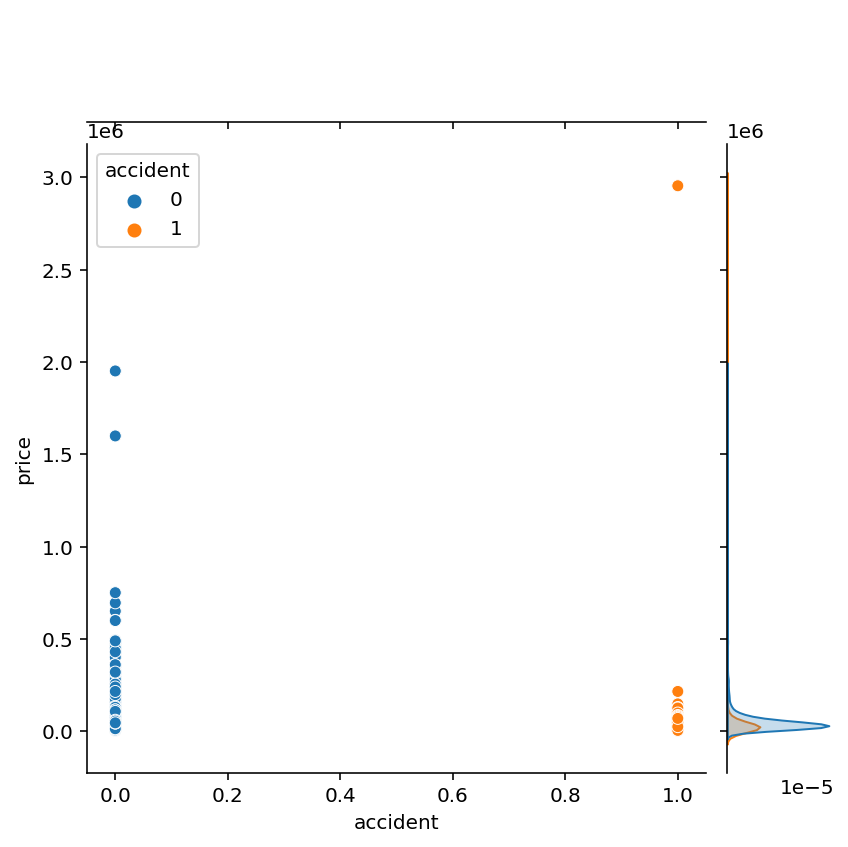

In [70]:
sns.jointplot(x='accident', y='price', data=data, hue='accident')
plt.show()

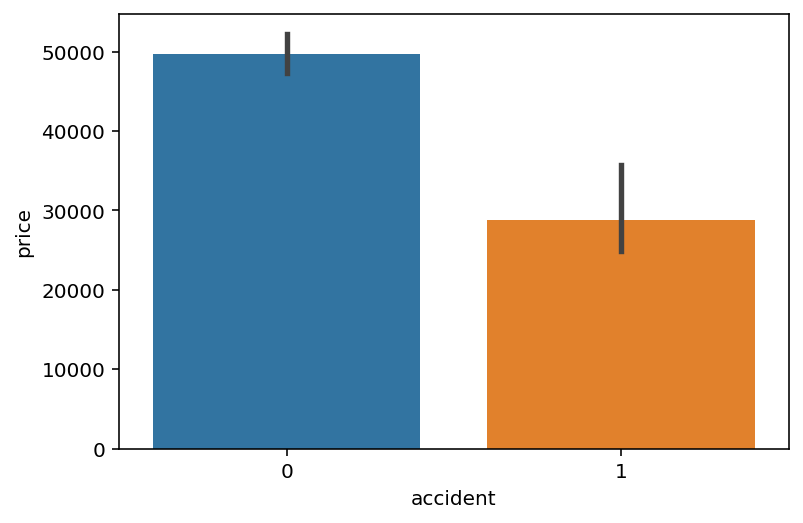

In [71]:
sns.barplot(x='accident', y='price', data=data)
plt.show()

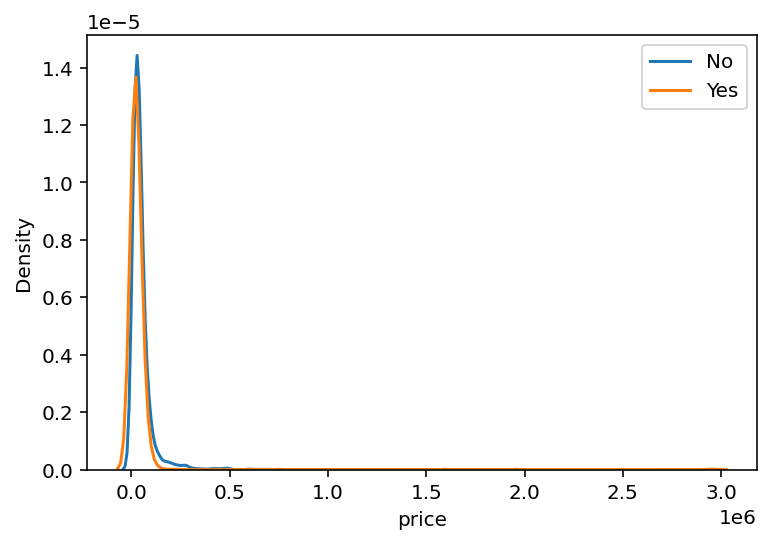

In [72]:
d1 = data.loc[data['accident'] == 0]
d2 = data.loc[data['accident'] == 1]

sns.kdeplot(x = 'price', data = d1, label = 'No')
sns.kdeplot(x = 'price', data = d2, label = 'Yes')

plt.legend()
plt.show()

accident가 있으면(value==1) price가 상대적으로 낮다.

([<matplotlib.patches.Wedge at 0x21a39c75670>,
 [Text(1.0508807816453112, 0.3250378174436633, '14'),
  Text(0.6873238070715484, 0.8588282623625477, '4'),
  Text(0.14152660625212038, 1.0908575616104779, '36'),
  Text(-0.3779812394188488, 1.0330199333252923, '9'),
  Text(-0.7406023883357009, 0.8133314837084914, '53'),
  Text(-0.9558636094501302, 0.5443571990237376, '3'),
  Text(-1.0755425531714198, 0.23066906233282328, '43'),
  Text(-1.0974171897299114, -0.07533599196469117, '27'),
  Text(-1.0476864421729728, -0.33519116767441554, '22'),
  Text(-0.9532187244510759, -0.5489754669890667, '26'),
  Text(-0.8298442225818717, -0.7220516368290353, '39'),
  Text(-0.6907808370266469, -0.856050135913058, '8'),
  Text(-0.5489754614111437, -0.9532187276635001, '44'),
  Text(-0.4061572911998625, -1.0222701476641045, '11'),
  Text(-0.2566173966579268, -1.0696483121720468, '15'),
  Text(-0.10362510905477253, -1.0951081393056061, '52'),
  Text(0.039906244189661946, -1.0992758942479706, '24'),
  Text(0.1

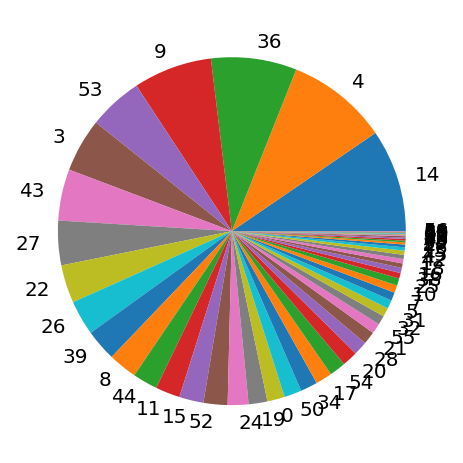

In [73]:
cnt = data['brand'].value_counts()
plt.pie(cnt.values, labels = cnt.index)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

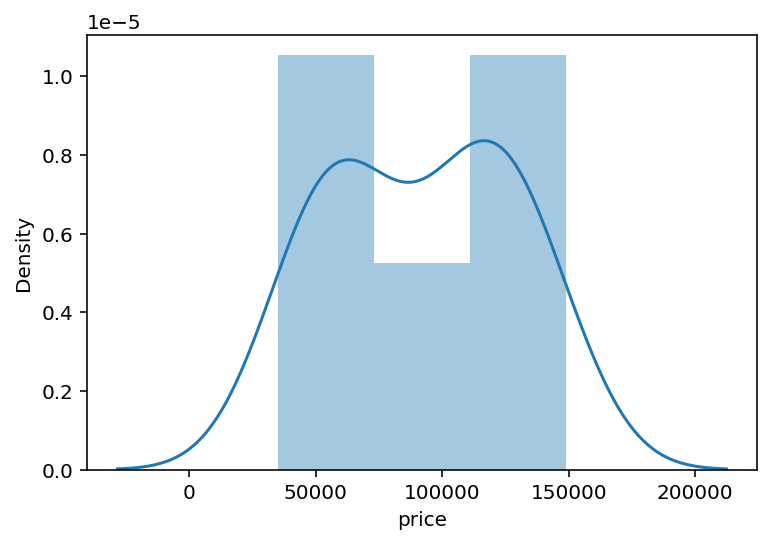

In [74]:
model142 = data.loc[data['model'] == 142]
sns.distplot(model142['price'])

model 142의 가격대는 약 40,000 ~ 150,000까지 다양함  
-> 같은 model 안에서 가격대가 일정하지 않으므로, model보다 더 큰 영향을 주는 요인이 있음

<span style="color:green"> model_year </span>

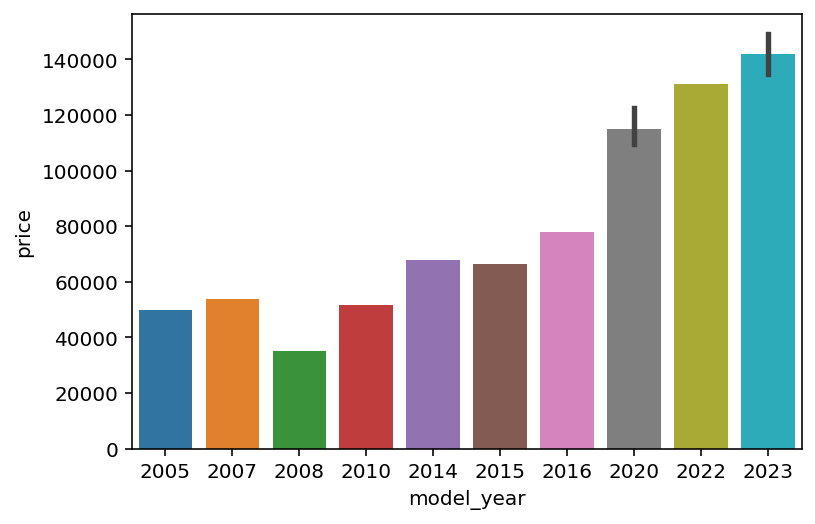

In [75]:
tmp = model142.loc[model142['accident'] == 0]
sns.barplot(x="model_year", y="price", data=tmp)
plt.show()

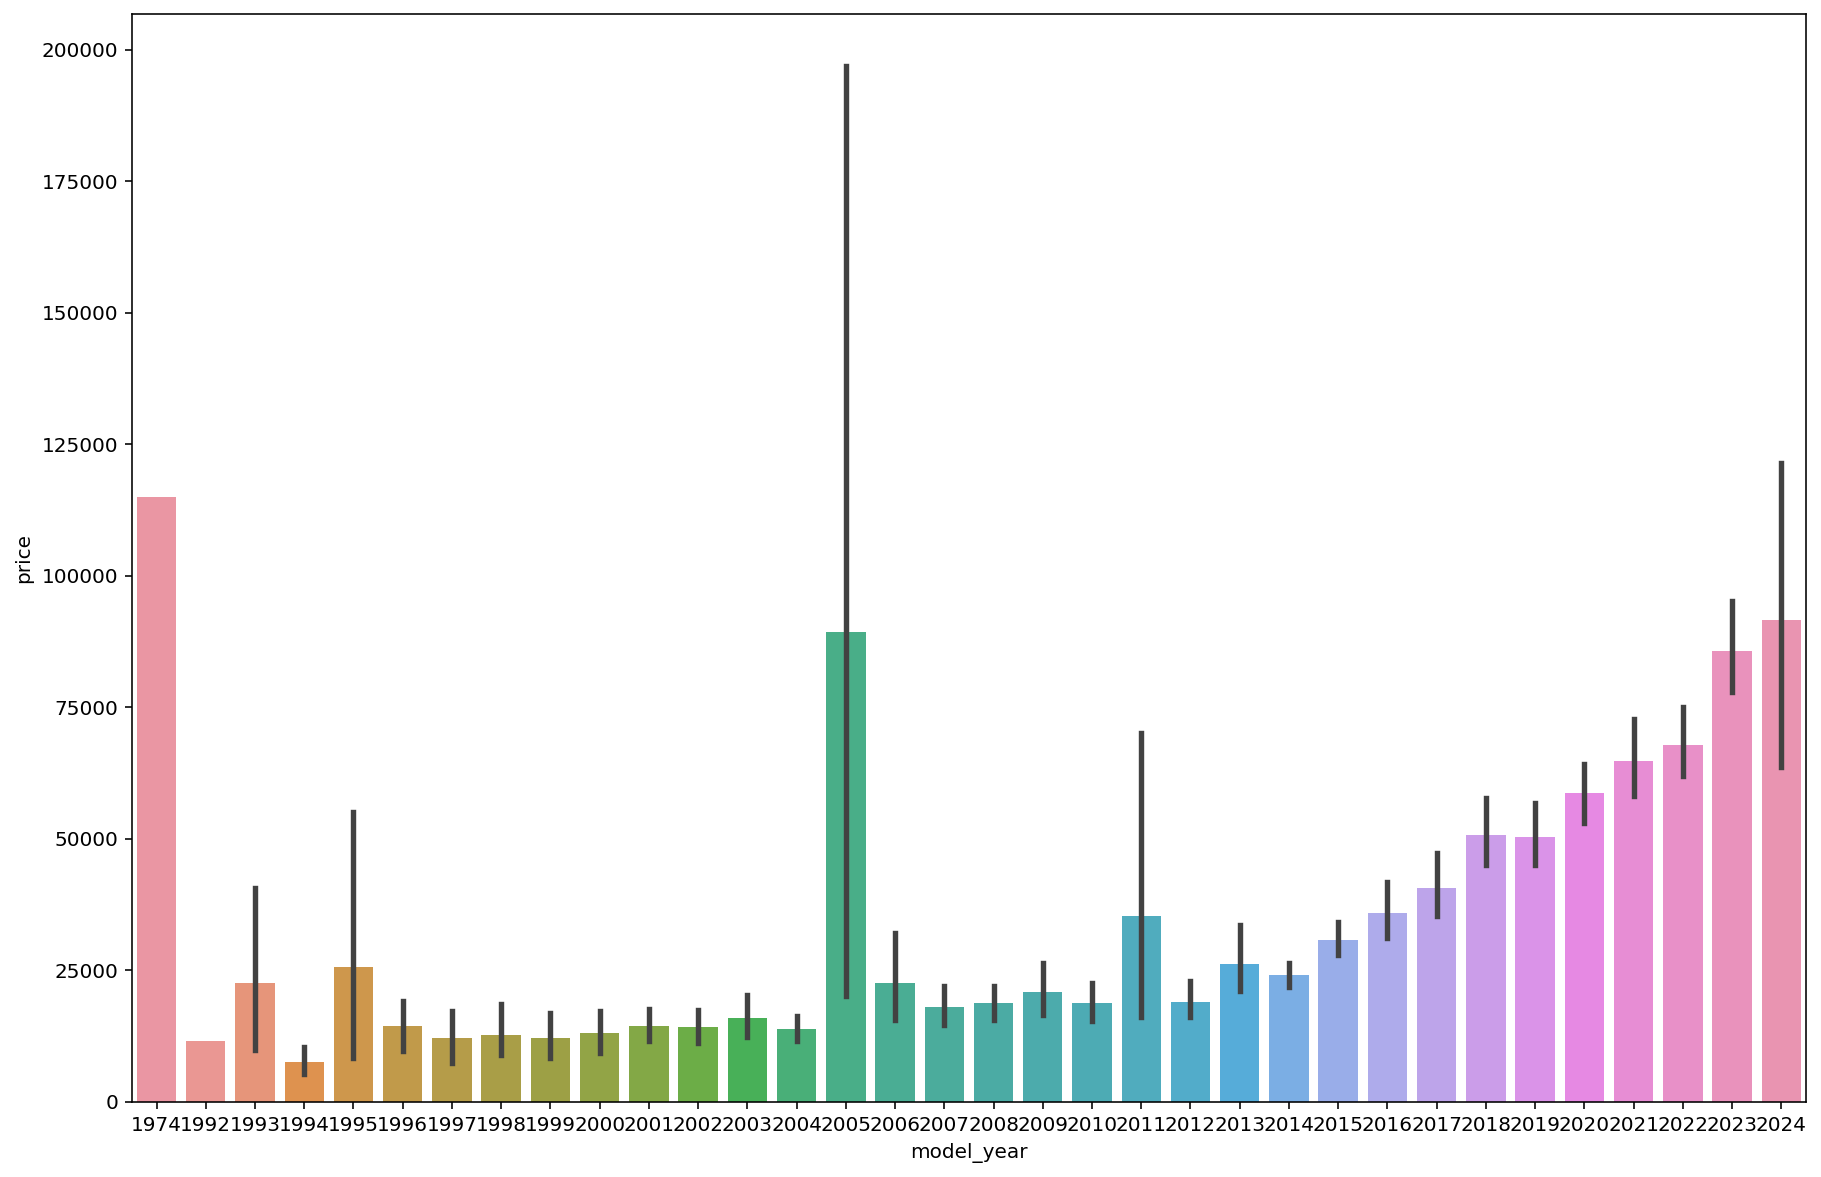

In [76]:
plt.figure(figsize = (15, 10))
sns.barplot(x='model_year', y='price', data=data)

plt.show()

대체로 model_year와 가격은 비례한다.  
accident보다 model_year가 가격에 미치는 영향이 더 크다.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

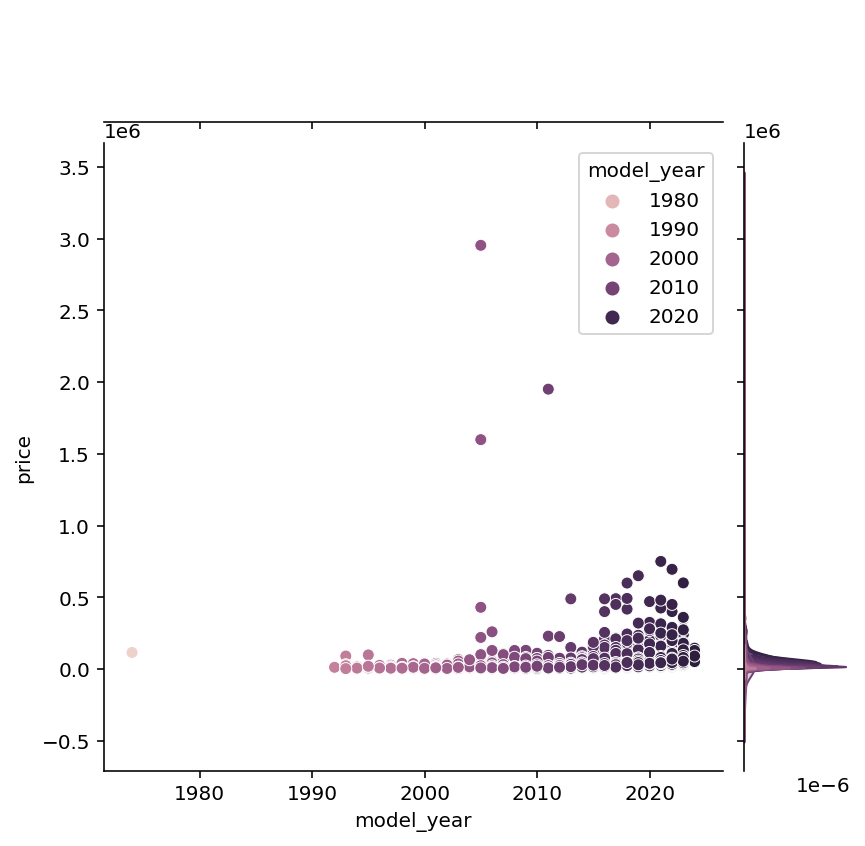

In [77]:
sns.jointplot(x='model_year', y='price', data=data, hue='model_year')
plt.show()

model_year와 가격이 상관관계가 높은 편이다.

<span style="color:green"> clean_title </span>

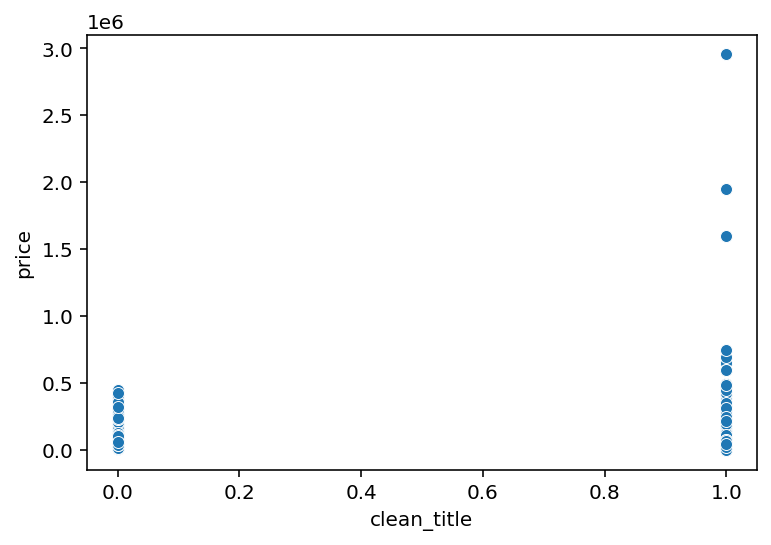

In [78]:
sns.scatterplot(x='clean_title', y='price', data=data)
plt.show()

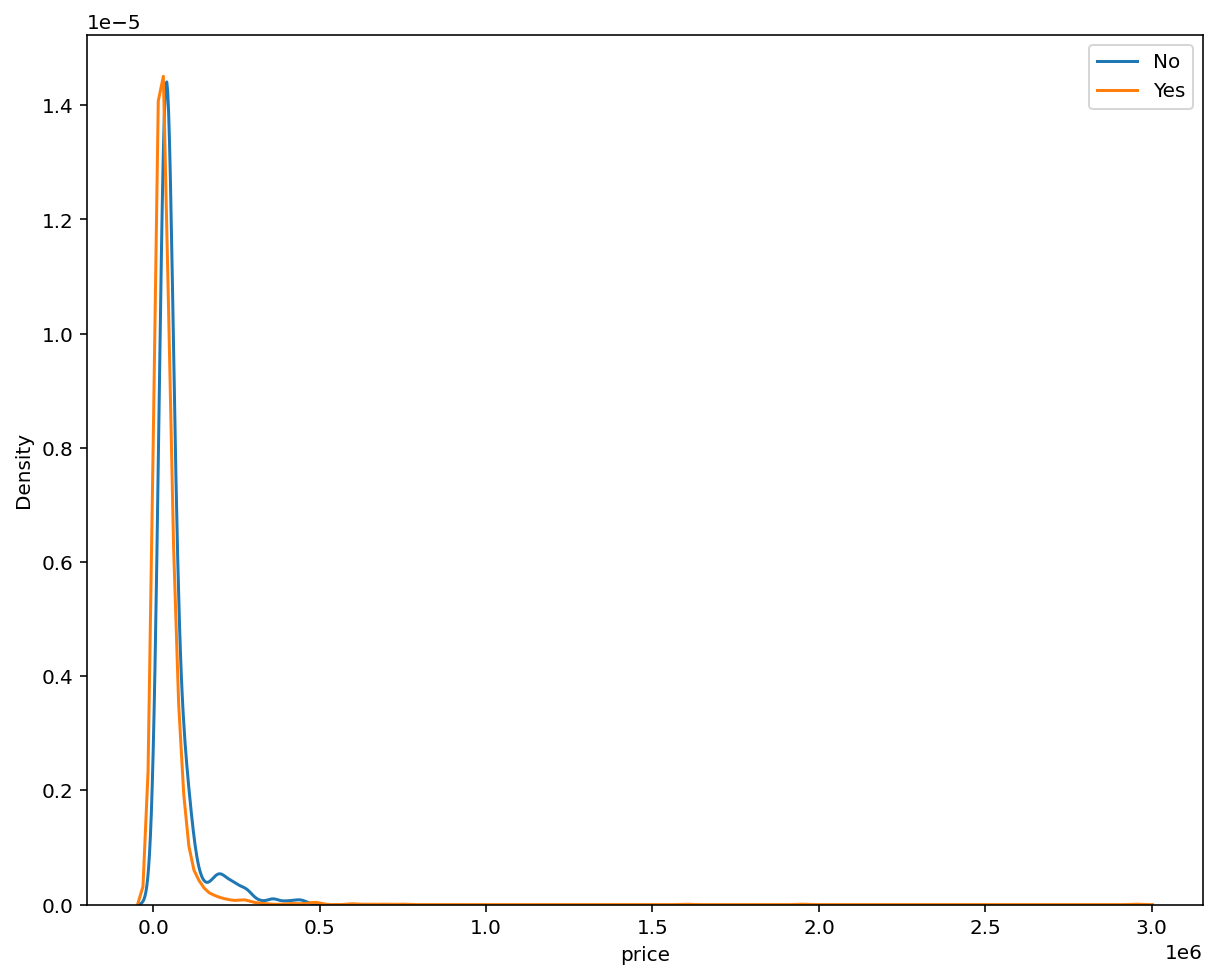

In [79]:
c1 = data.loc[data['clean_title'] == 0]
c2 = data.loc[data['clean_title'] == 1]

plt.figure(figsize = (10, 8))

sns.kdeplot(x = 'price', data = c1, label = 'No')
sns.kdeplot(x = 'price', data = c2, label = 'Yes')

plt.legend()
plt.show()

clean_title이 없는 경우, 가격이 0.5e6 이하에서 형성된다.  
clean_title이 있는 경우, 대부분의 가격이 0.8e6 이하에서 형성된다. 즉, 없는 경우보다 가격대가 높다.

<span style="color:green"> model_year </span>

그렇다면 model_year가 동일한 그룹에서는 model이 영향을 얼마나 미칠까?

In [80]:
data['model_year'].describe()

count    3896.000000
mean     2015.516684
std         6.083985
min      1974.000000
25%      2012.000000
50%      2017.000000
75%      2020.000000
max      2024.000000
Name: model_year, dtype: float64

In [81]:
# model_year == 2016
year2016 = data.loc[data['model_year'] == 2016]

In [82]:
# 이상치 제거
year2016_20 = year2016.loc[year2016['price'] <= 200000]

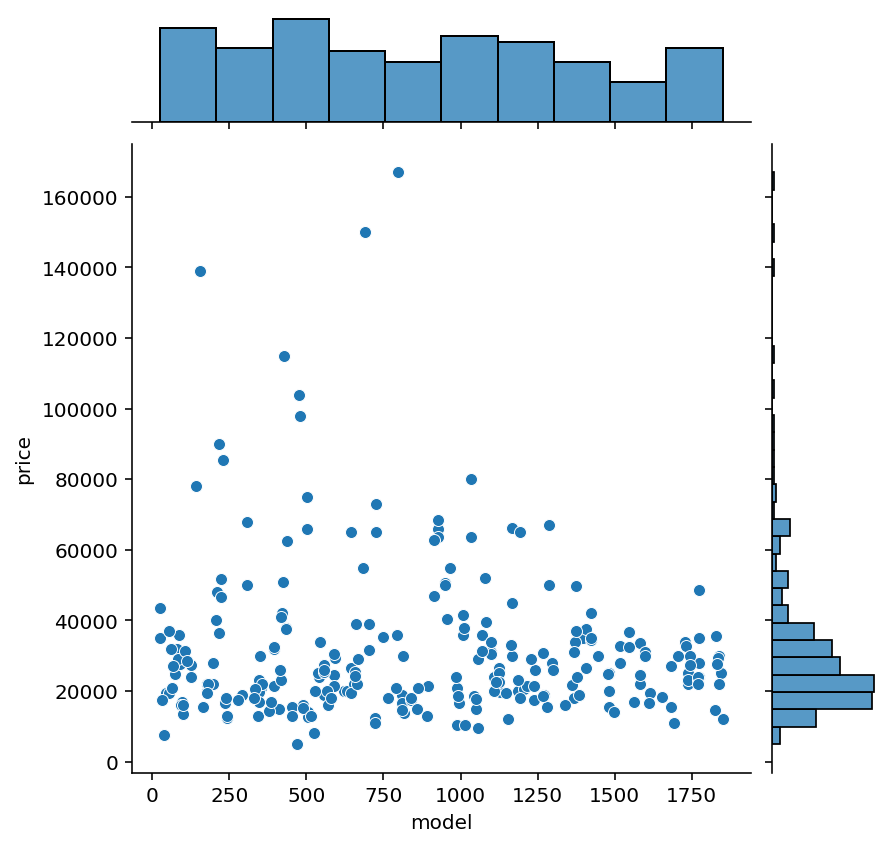

In [83]:
sns.jointplot(x='model', y='price', data=year2016_20)
plt.show()

In [84]:
year2016['price'].describe()

count       264.000000
mean      35867.041667
std       45474.299766
min        5000.000000
25%       18998.750000
50%       25000.000000
75%       35600.000000
max      489000.000000
Name: price, dtype: float64

똑같이 2016년 모델인데 가격의 표준편차가 45,000 정도로 매우 큼.  
-> 다른 요인이 매우 크게 작용

<span style="color:green"> model </span>

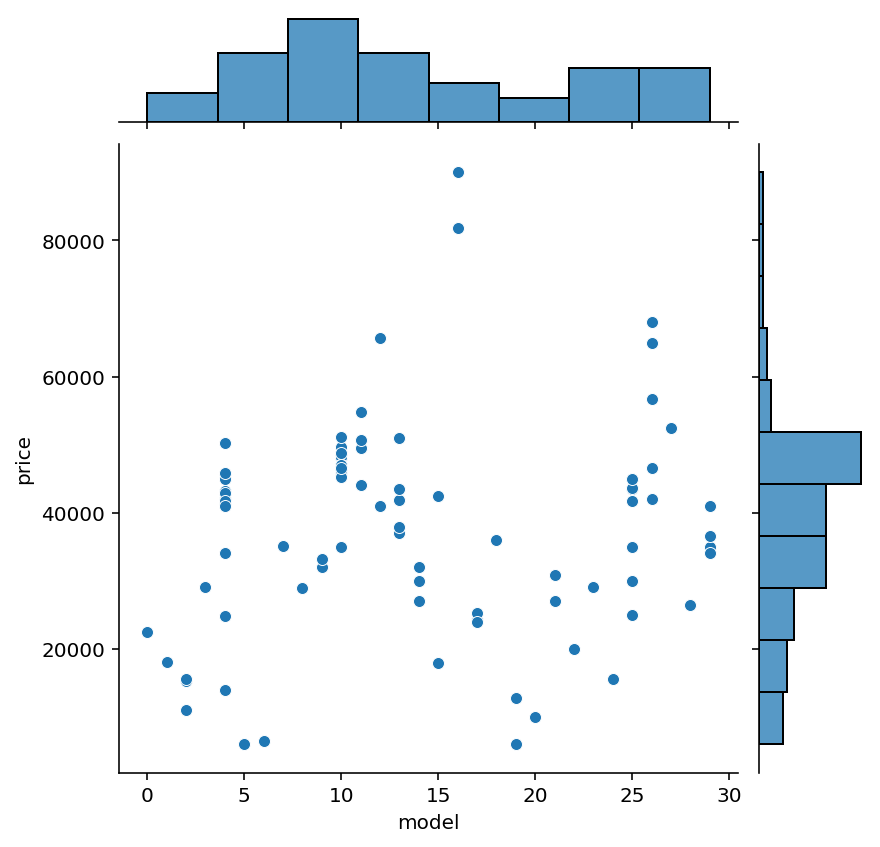

In [85]:
tmp = data.loc[data['model'] < 30]
sns.jointplot(x='model', y='price', data=tmp)
plt.show()

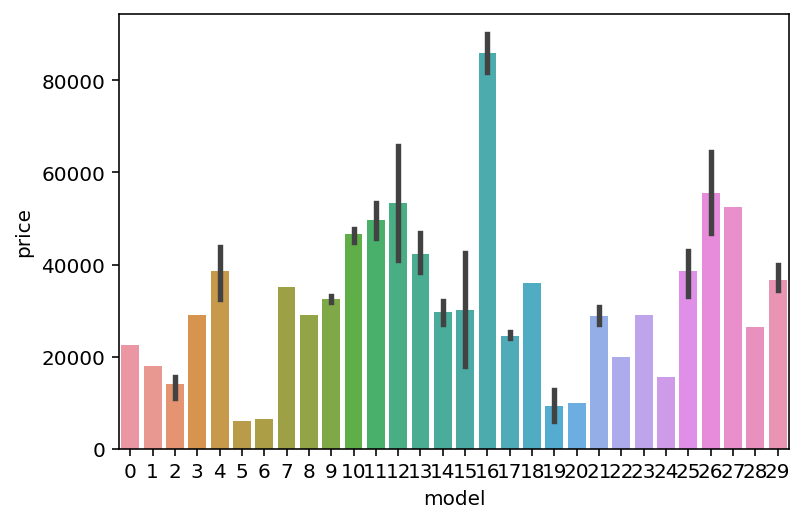

In [86]:
sns.barplot(x = 'model', y = 'price', data=tmp)
plt.show()

model별로 가격대가 다르고, 같은 model 안에서의 가격 차이는 서로 다른 model끼리의 가격 차이보다 작다.

In [87]:
d = data.groupby('model')['price'].mean()
d.head()

model
0    22500.000000
1    18000.000000
2    13933.333333
3    29000.000000
4    38601.909091
Name: price, dtype: float64

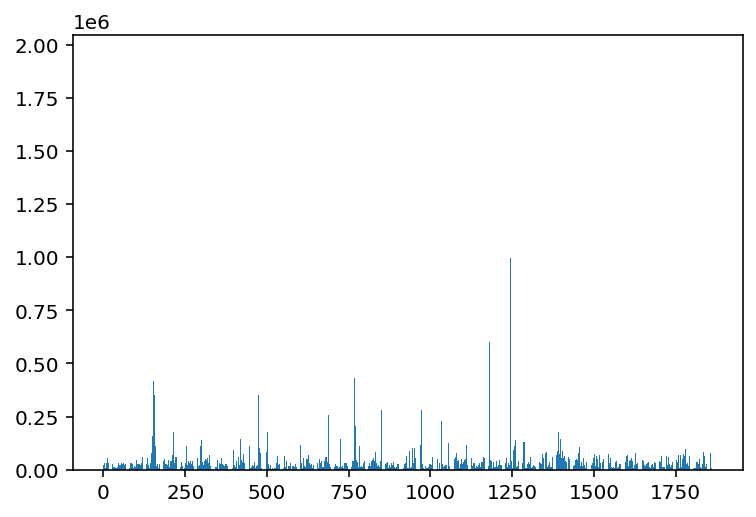

In [88]:
plt.bar(d.index, d.values)
plt.show()

<span style="color:green"> model_year </span>

In [89]:
dd = data.groupby('model_year')['price'].mean()
dd.head()

model_year
1974    115000.000000
1992     11500.000000
1993     22522.111111
1994      7539.857143
1995     25665.333333
Name: price, dtype: float64

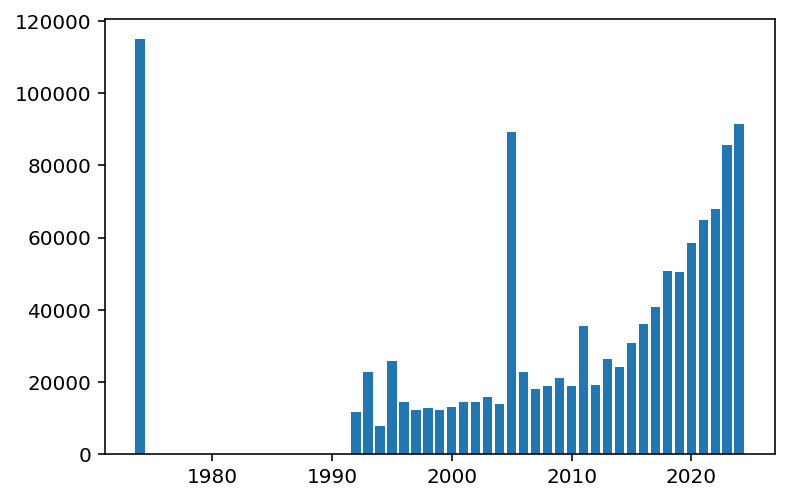

In [90]:
plt.bar(dd.index, dd.values)
plt.show()

<span style="color:green"> milage </span>

<Figure size 720x576 with 0 Axes>

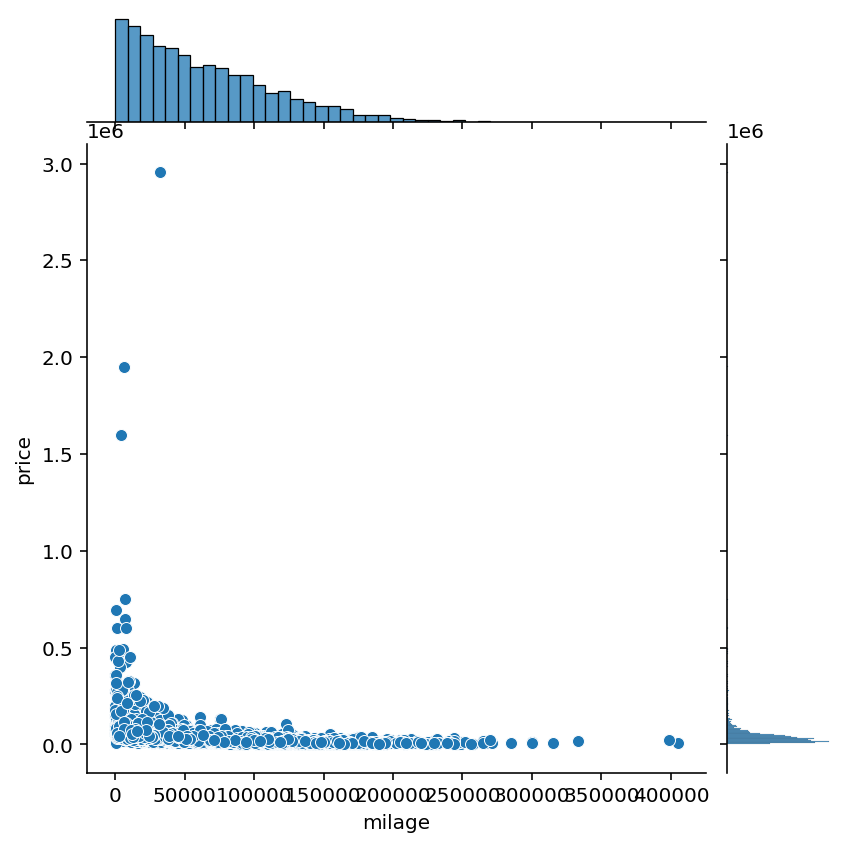

In [91]:
plt.figure(figsize = (10, 8))

sns.jointplot(x='milage', y='price', data=data)
plt.show()

<span style="color:green"> engine </span>

In [176]:
temp = data.loc[data['engine'] < 30]

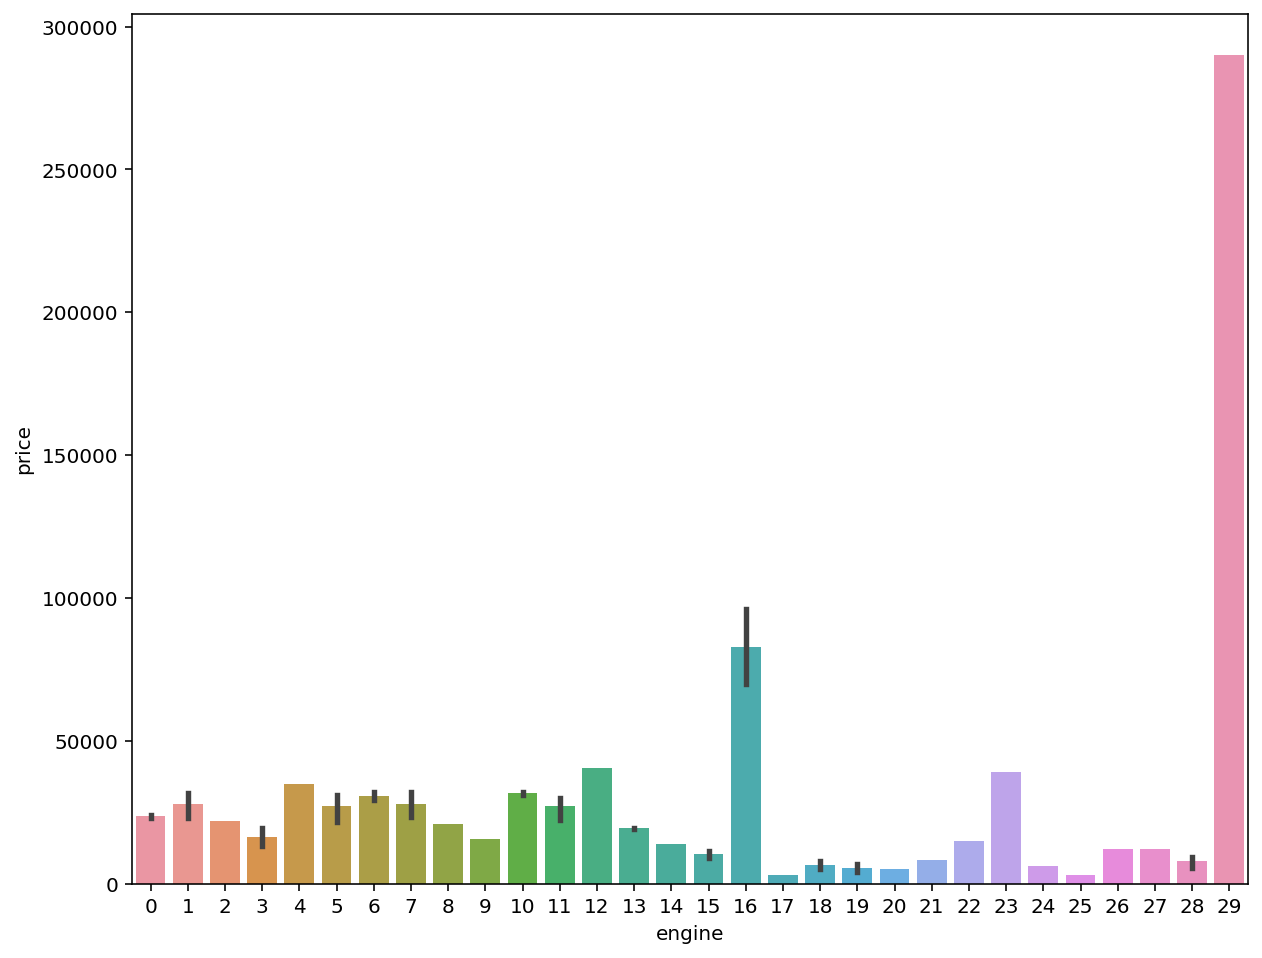

In [177]:
plt.figure(figsize = (10, 8))
sns.barplot(x='engine', y='price', data=temp)
plt.show()

engine별로 가격대가 다르고, 같은 engine 안에서의 가격 차이는 서로 다른 engine끼리의 가격 차이보다 작다.

**결론 : price는 milage, model과 model_year, engine의 영향을 가장 크게 받고, 그 다음으로는 accident, clean_title이 영향을 미친다.**

------

<span style="color:blue"> 가격 예측 </span>

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [95]:
x = data.loc[:, ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']]
y = data.loc[:, ['price']]

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

<span style="color:orange"> 선형 회귀 </span>

In [97]:
model = LinearRegression()

In [98]:
model.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(x_test)

In [100]:
print(mean_absolute_error(y_test, y_pred))

22647.447901934964


In [179]:
y_test.values

array([[51500],
       [ 5900],
       [61599],
       ...,
       [37000],
       [98000],
       [50998]], dtype=int64)

<span style="color:orange">  </span>

In [181]:
y_pred

array([[ 67291.32915155],
       [-19233.14741275],
       [ 67230.0271721 ],
       ...,
       [ 62977.9856503 ],
       [ 72023.56452081],
       [ 73548.74972168]])

In [182]:
print(r2_score(y_test, y_pred))

0.3028457868396388


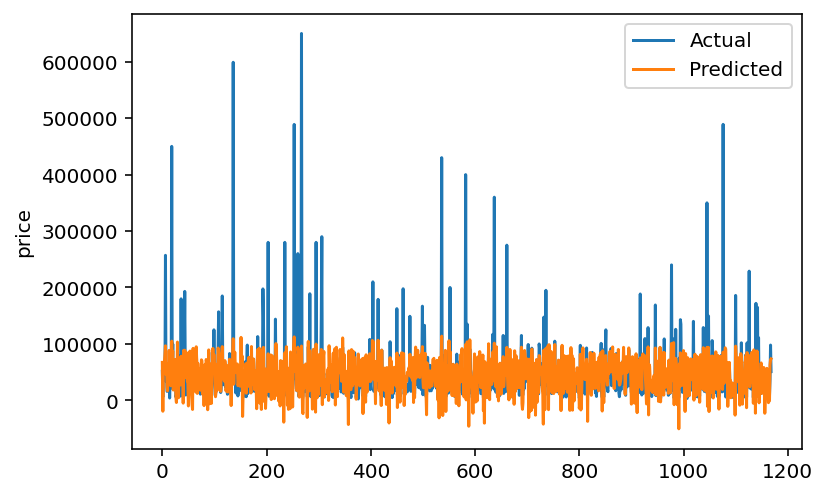

In [186]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('price')
plt.show()

<span style='color:orange'> KNN </span>

In [199]:
model = KNeighborsRegressor(n_neighbors=3)

In [200]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [201]:
y_pred = model.predict(x_test)

In [202]:
print(r2_score(y_test, y_pred))

-0.2553668106440541


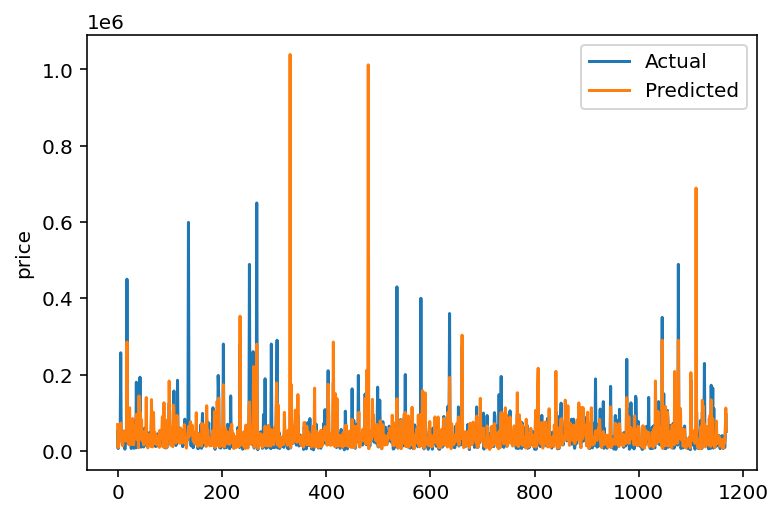

In [203]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('price')
plt.show()